# Lab №2

## Выполнение

### 0.  Import the necessary libraries

In [299]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb
import spatialmath as sm

### 1. Import the IRB140 model

In [300]:
# Load IRB140 robot model 
robot = rtb.models.DH.IRB140()
print(robot)

DHRobot: IRB 140 (by ABB), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌─────┬───────┬──────┬────────┬─────────┬────────┐
│ θⱼ  │  dⱼ   │  aⱼ  │   ⍺ⱼ   │   q⁻    │   q⁺   │
├─────┼───────┼──────┼────────┼─────────┼────────┤
│  q1 │ 0.352 │ 0.07 │ -90.0° │ -180.0° │ 180.0° │
│  q2 │     0 │ 0.36 │   0.0° │ -100.0° │ 100.0° │
│  q3 │     0 │    0 │ -90.0° │ -220.0° │  60.0° │
│  q4 │  0.38 │    0 │  90.0° │ -200.0° │ 200.0° │
│  q5 │     0 │    0 │ -90.0° │ -120.0° │ 120.0° │
│  q6 │ 0.065 │    0 │   0.0° │ -400.0° │ 400.0° │
└─────┴───────┴──────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬─────┬──────┬───────┬─────┬──────┬──────┐
│ name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5   │
├──────┼─────┼──────┼───────┼─────┼──────┼──────┤
│   qr │  0° │ -90° │  90°  │  0° │  90° │ -90° │
│   qz │  0° │  0°  │  0°   │  0° │  0°  │  0°  │
│   qd │  0° │ -90° │  180° │  0° │  0°  │ -90° │
└──────┴─────┴──────┴───────┴─────┴──────┴──────┘



In [301]:
print(robot.links[0].dyn()) 

m     =        35 
r     =     0.028    0.043   -0.089 
        |     0.51   0.0014    0.051 | 
I     = |   0.0014     0.46     0.07 | 
        |    0.051     0.07     0.46 | 
Jm    =         0 
B     =         0 
Tc    =         0(+)        0(-) 
G     =         0 
qlim  =      -3.1 to      3.1


In [302]:
robot.links[0].m = 35.0    # Base
robot.links[1].m = 18.4    # Lower arm
robot.links[2].m = 11.1    # Upper arm
robot.links[3].m = 2.04    # Wrist 1
robot.links[4].m = 1.30    # Wrist 2
robot.links[5].m = 0.42    # Wrist 3

In [303]:
robot.links[0].r = [0, 0, 0.18]          # Base COM
robot.links[1].r = [0.18, 0, 0.26]       # Lower arm COM
robot.links[2].r = [0.32, 0, 0.05]       # Upper arm COM
robot.links[3].r = [0, 0.02, 0.12]       # Wrist 1 COM
robot.links[4].r = [0, 0, 0.06]          # Wrist 2 COM
robot.links[5].r = [0, 0, 0.02]          # Wrist 3 COM

In [304]:
robot.links[0].I = [0.7, 0.7, 0.3, 0, 0, 0]          # Base
robot.links[1].I = [0.35, 1.2, 1.1, 0, 0, 0]         # Lower arm
robot.links[2].I = [0.15, 0.25, 0.09, 0, 0, 0]       # Upper arm
robot.links[3].I = [0.003, 0.003, 0.004, 0, 0, 0]    # Wrist 1
robot.links[4].I = [0.001, 0.001, 0.001, 0, 0, 0]    # Wrist 2
robot.links[5].I = [0.0002, 0.0002, 0.0001, 0, 0, 0] # Wrist 3

In [305]:
robot.links[0].Jm = 0.0005
robot.links[1].Jm = 0.0005
robot.links[2].Jm = 0.0003
robot.links[3].Jm = 0.0001
robot.links[4].Jm = 0.0001
robot.links[5].Jm = 0.00005

In [306]:
robot.links[0].B = 0.002
robot.links[1].B = 0.0015
robot.links[2].B = 0.001
robot.links[3].B = 0.0005
robot.links[4].B = 0.0005
robot.links[5].B = 0.0002

In [307]:
robot.links[0].Tc = [0.45, -0.45]
robot.links[1].Tc = [0.35, -0.35]
robot.links[2].Tc = [0.20, -0.20]
robot.links[3].Tc = [0.08, -0.08]
robot.links[4].Tc = [0.06, -0.06]
robot.links[5].Tc = [0.04, -0.04]

In [308]:
robot.links[0].G = -120.0    # Joint 1
robot.links[1].G = 120.0     # Joint 2
robot.links[2].G = -80.0     # Joint 3
robot.links[3].G = 80.0      # Joint 4
robot.links[4].G = 70.0      # Joint 5
robot.links[5].G = 70.0      # Joint 6

In [309]:
robot.links[0].qlim = [-170*pi/180, 170*pi/180]    # ±170°
robot.links[1].qlim = [-90*pi/180, 150*pi/180]     # -90° to +150°
robot.links[2].qlim = [-180*pi/180, 75*pi/180]     # -180° to +75°
robot.links[3].qlim = [-200*pi/180, 200*pi/180]    # ±200°
robot.links[4].qlim = [-120*pi/180, 120*pi/180]    # ±120°
robot.links[5].qlim = [-400*pi/180, 400*pi/180]    # ±400° (continuous rotation)

### 2. Let's set the initial position of the robot and build it

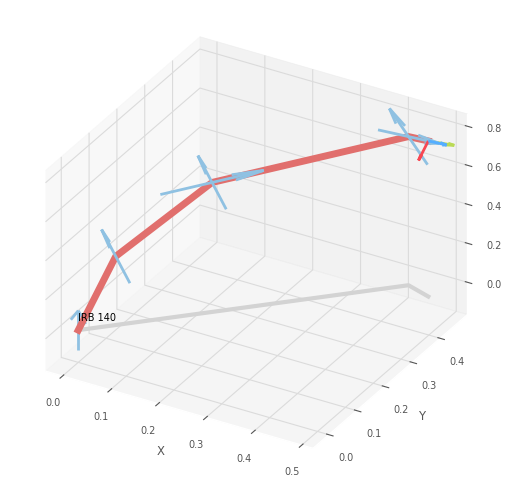

<Figure size 640x480 with 0 Axes>

In [310]:
# Set an arbitrary initial joint configuration within limits
q_start = [pi/4, -pi/3, -pi/4, pi/3, -pi/3, pi/4]
robot.plot(q_start)
plt.show()

### 3. Let's solve the direct kinematics problem

In [311]:
# Compute forward kinematics for q_start
T_start = robot.fkine(q_start)
print(T_start)

   0.128     0.5962    0.7926    0.4878    
  -0.805     0.5292   -0.2681    0.4189    
  -0.5792   -0.6038    0.5477    0.7977    
   0         0         0         1         



### 6. Let's build the manipulator's working area

Initialize variables

In [312]:
n = 20
i = 0
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(4)]
pose = np.zeros([3, n**4])

Calculating the working area

In [313]:
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:
            for q4 in move[3]:
                Tt = robot.fkine([q1, q2, q3, q4, 0, 0])
                for j in range(3):
                    pose[j][i] = Tt.t[j]
                i += 1

Building a work area

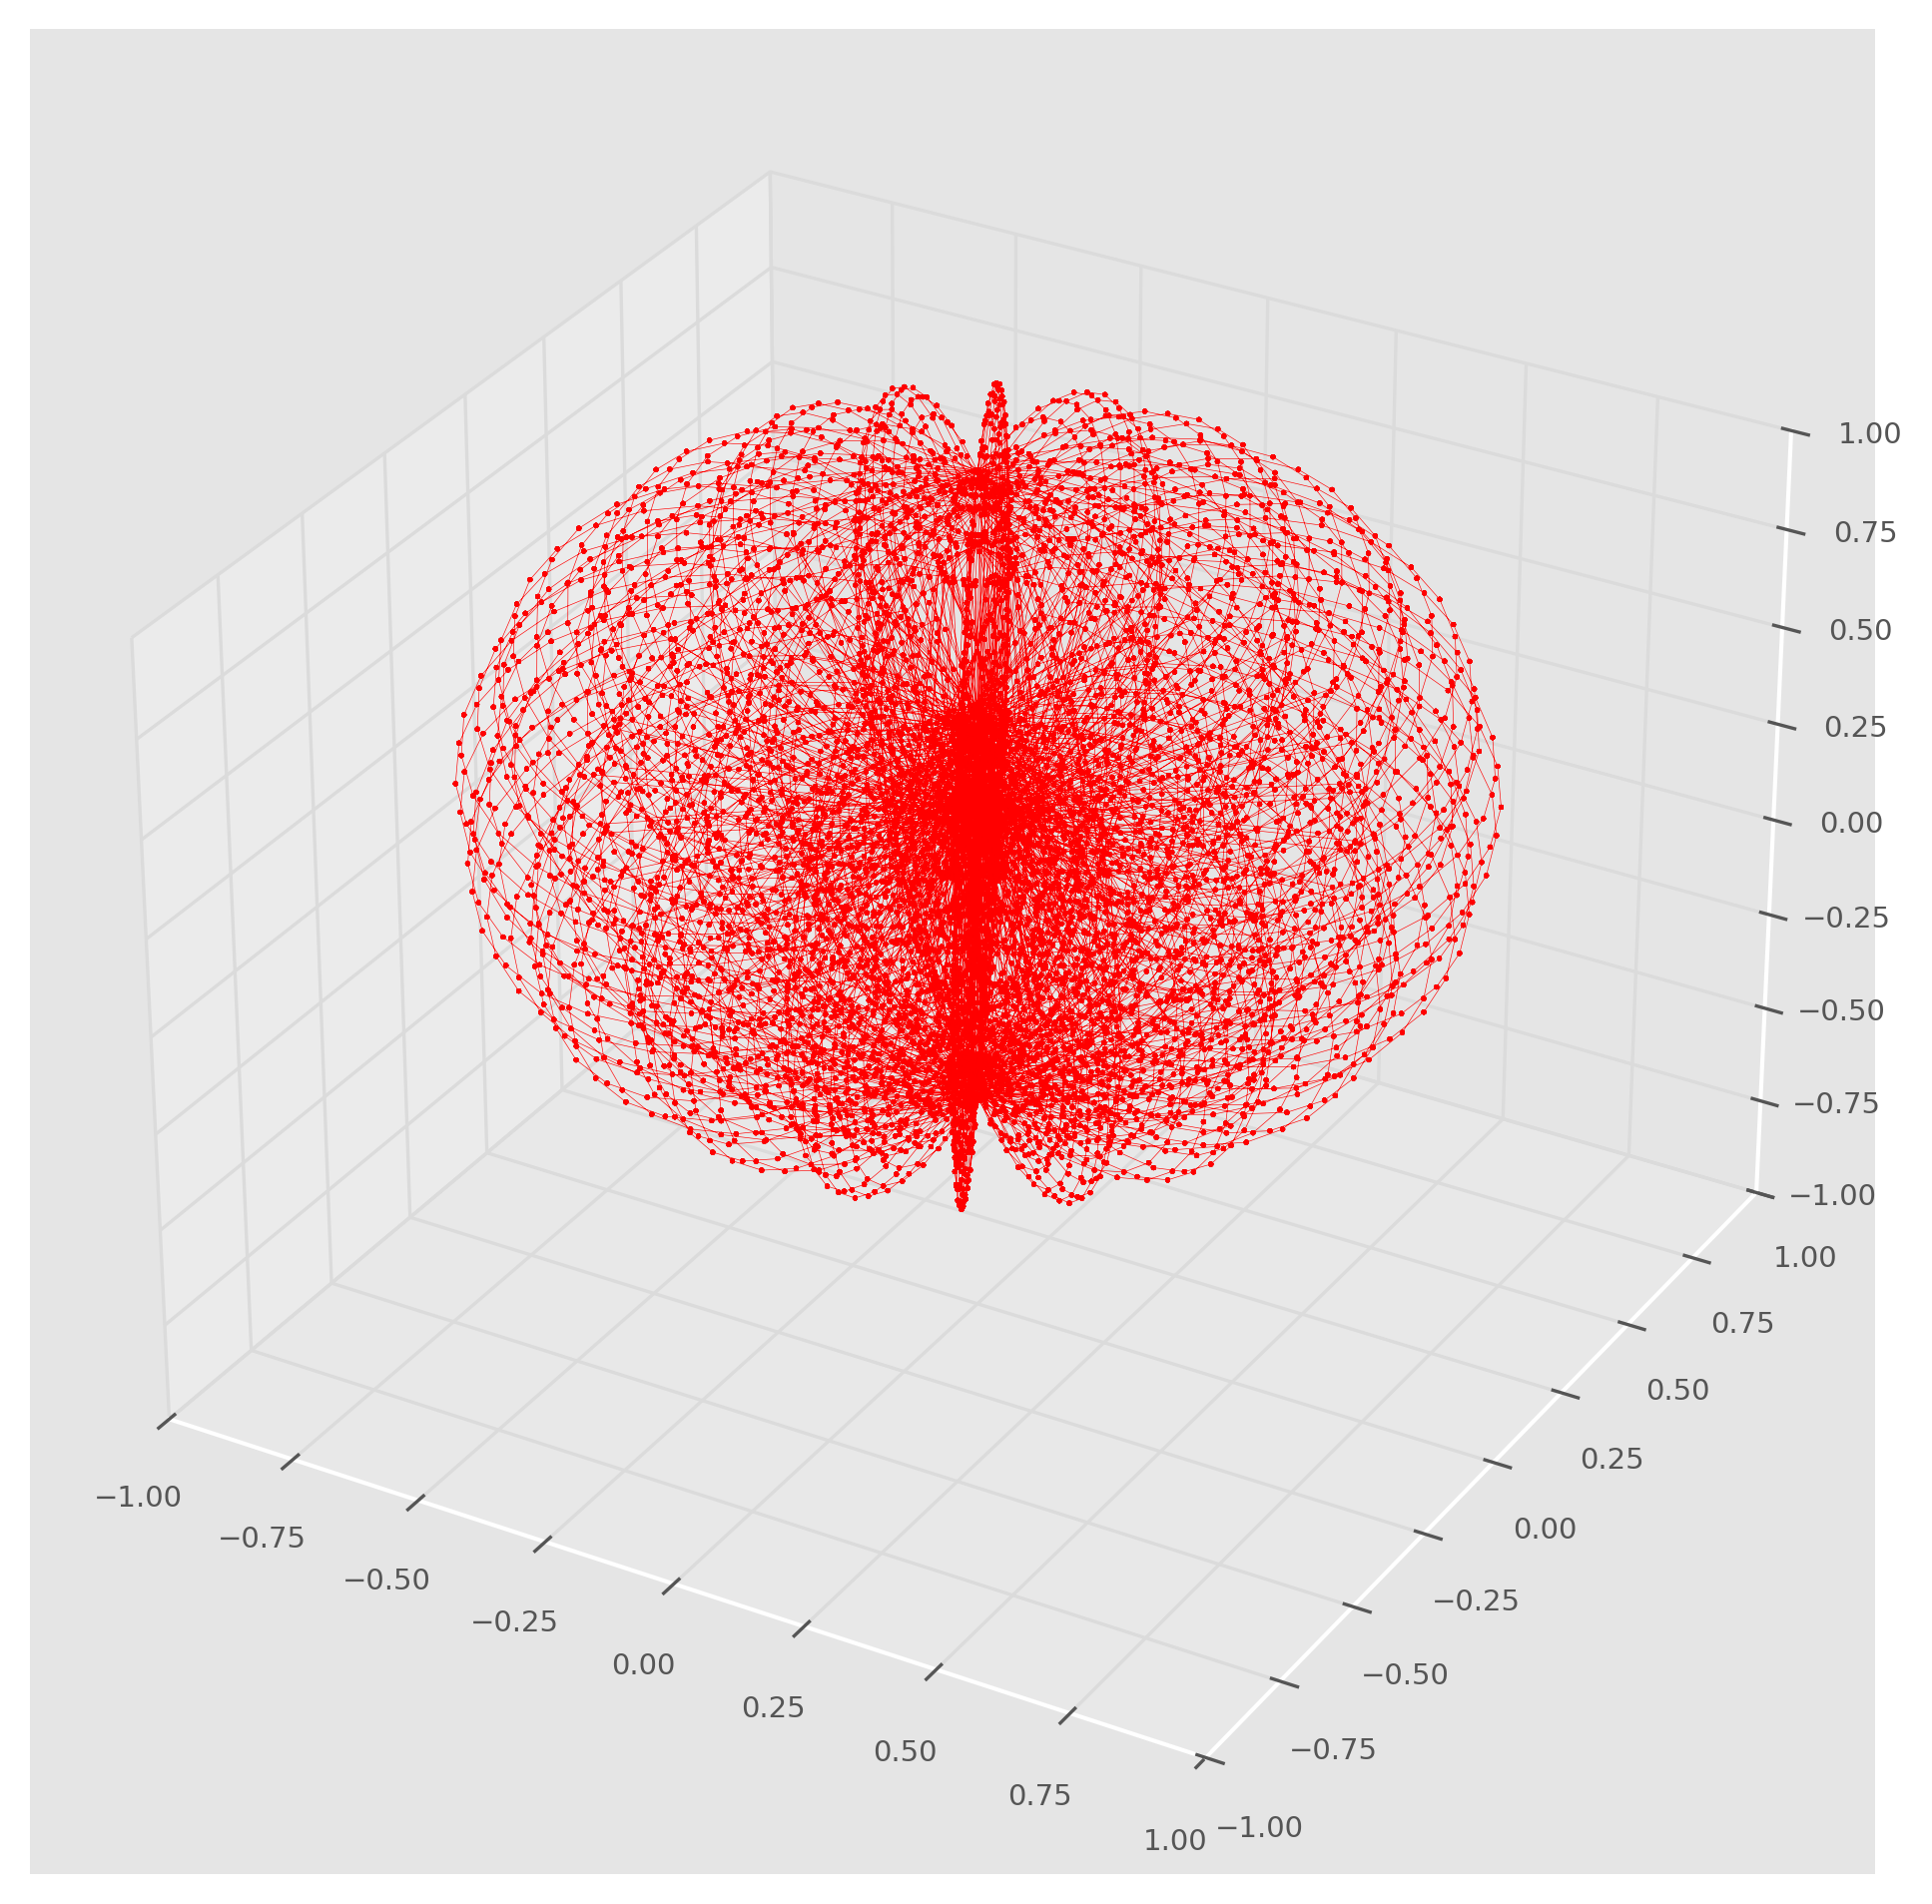

In [314]:
plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
ax.plot3D(pose[0], pose[1], pose[2], color='red', linewidth=0.15)
ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='red')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

### 7.  Let's choose the end point and check it (let's solve the inverse kinematics problem)

In [315]:
random_pose_index = np.random.choice(pose.shape[1])
random_pose_choice = pose[:,random_pose_index]

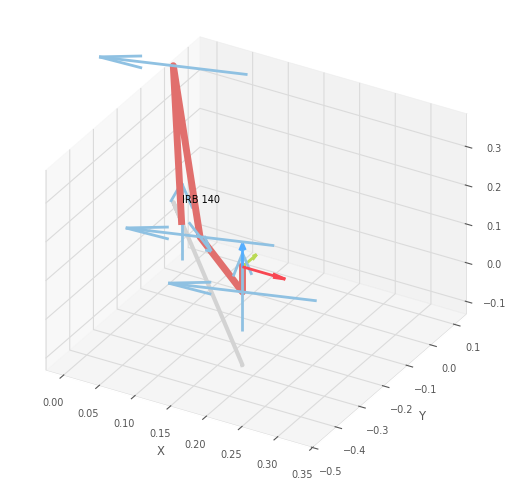

<Figure size 640x480 with 0 Axes>

In [316]:
T_end = sb.transl(random_pose_choice)
q_end = robot.ikine_GN(T_end).q  # Есть другие методы, помимо ikine_GN
robot.plot(q_end)
plt.show()

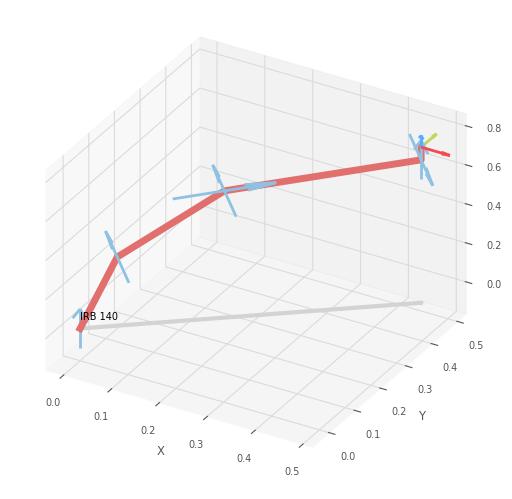

<Figure size 640x480 with 0 Axes>

In [326]:
point = [0.4878,0.4189,0.7977]
T_end = sb.transl(point)
q_end = robot.ikine_GN(T_end).q  # There are other methods besides ikine_GN
robot.plot(q_end)
plt.show()

Let's plan the trajectory

Let's plan a trajectory using the 'jtraj' method for $N$ = 100 points

In [318]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)

tr_jtraj = rtb.jtraj(q_start, q_end, time)

Let's plan the same trajectory using the 'mtraj' method with the 'trapezoidal' function

In [319]:
tr_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, time)

Let's plan the same trajectory using the 'mtraj' method with the 'quintic' function

In [320]:
tr_quin = rtb.mtraj(rtb.quintic, q_start, q_end, time)

### 9. Let's plot the graphs

Let's plot the position graphs for each link

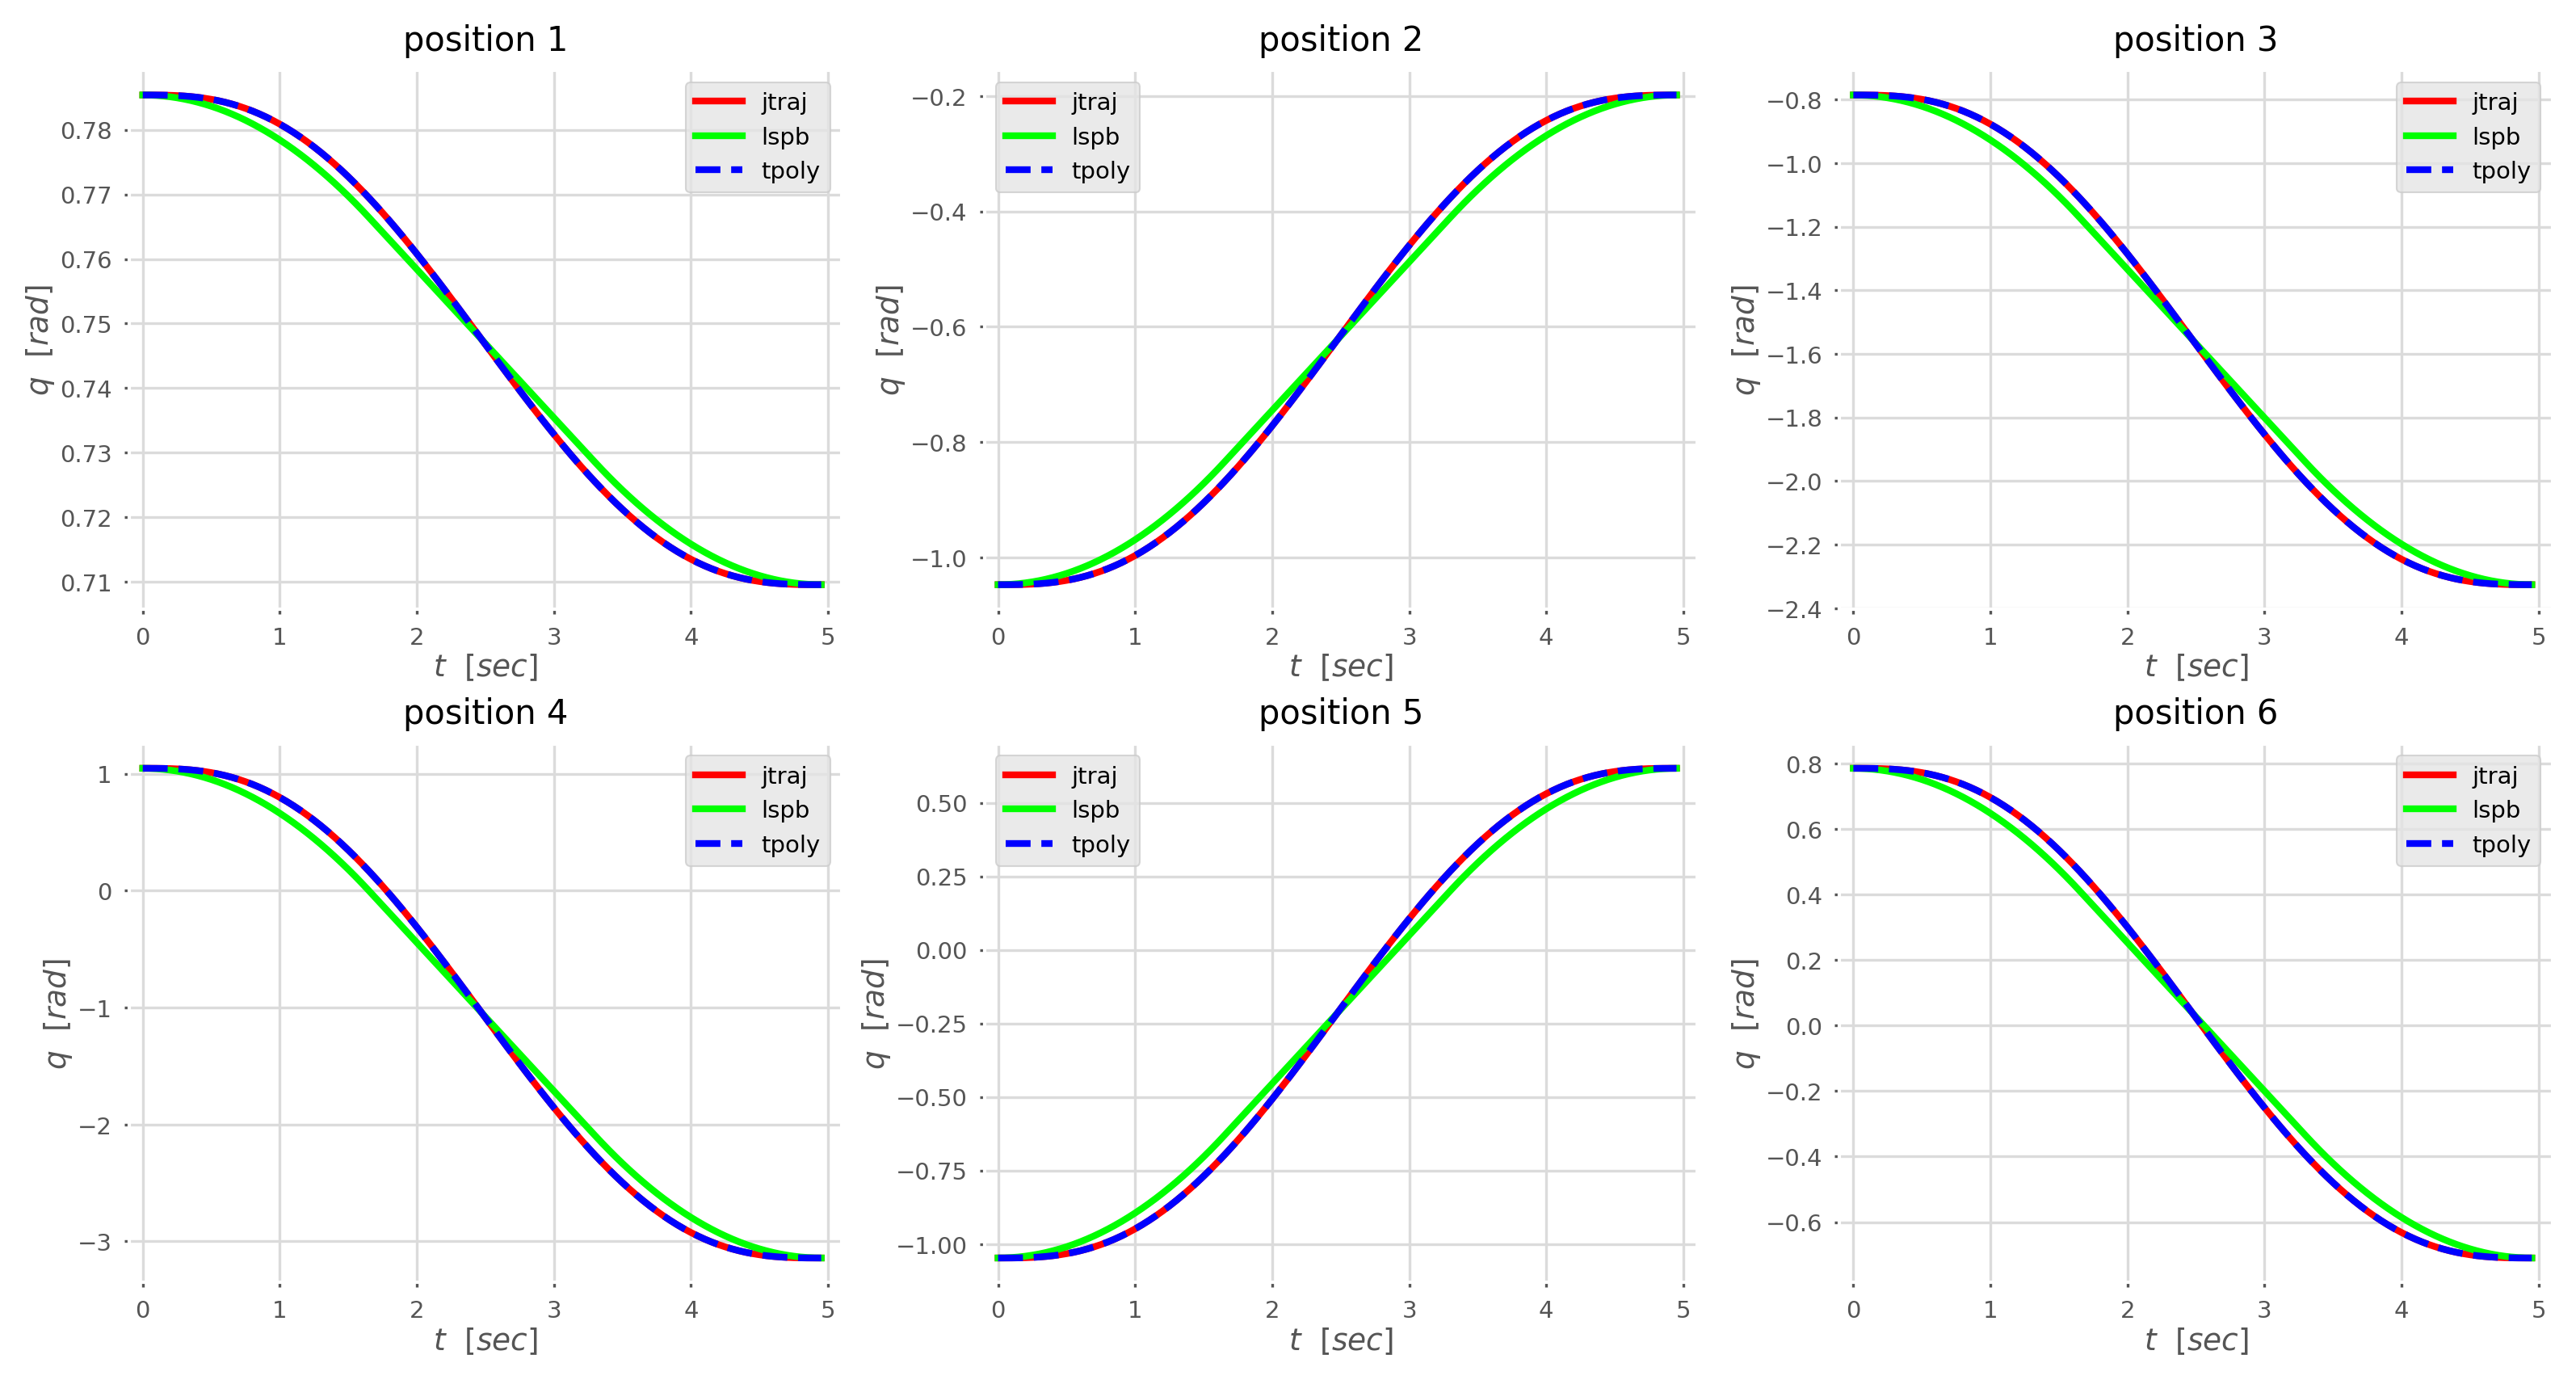

In [323]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.q[i][g-1] for i in range(len(tr_jtraj.q))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.q[i][g-1] for i in range(len(tr_trap.q))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.q[i][g-1] for i in range(len(tr_quin.q))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"position {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$q$  [$rad$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Let's plot the speed graphs for each link

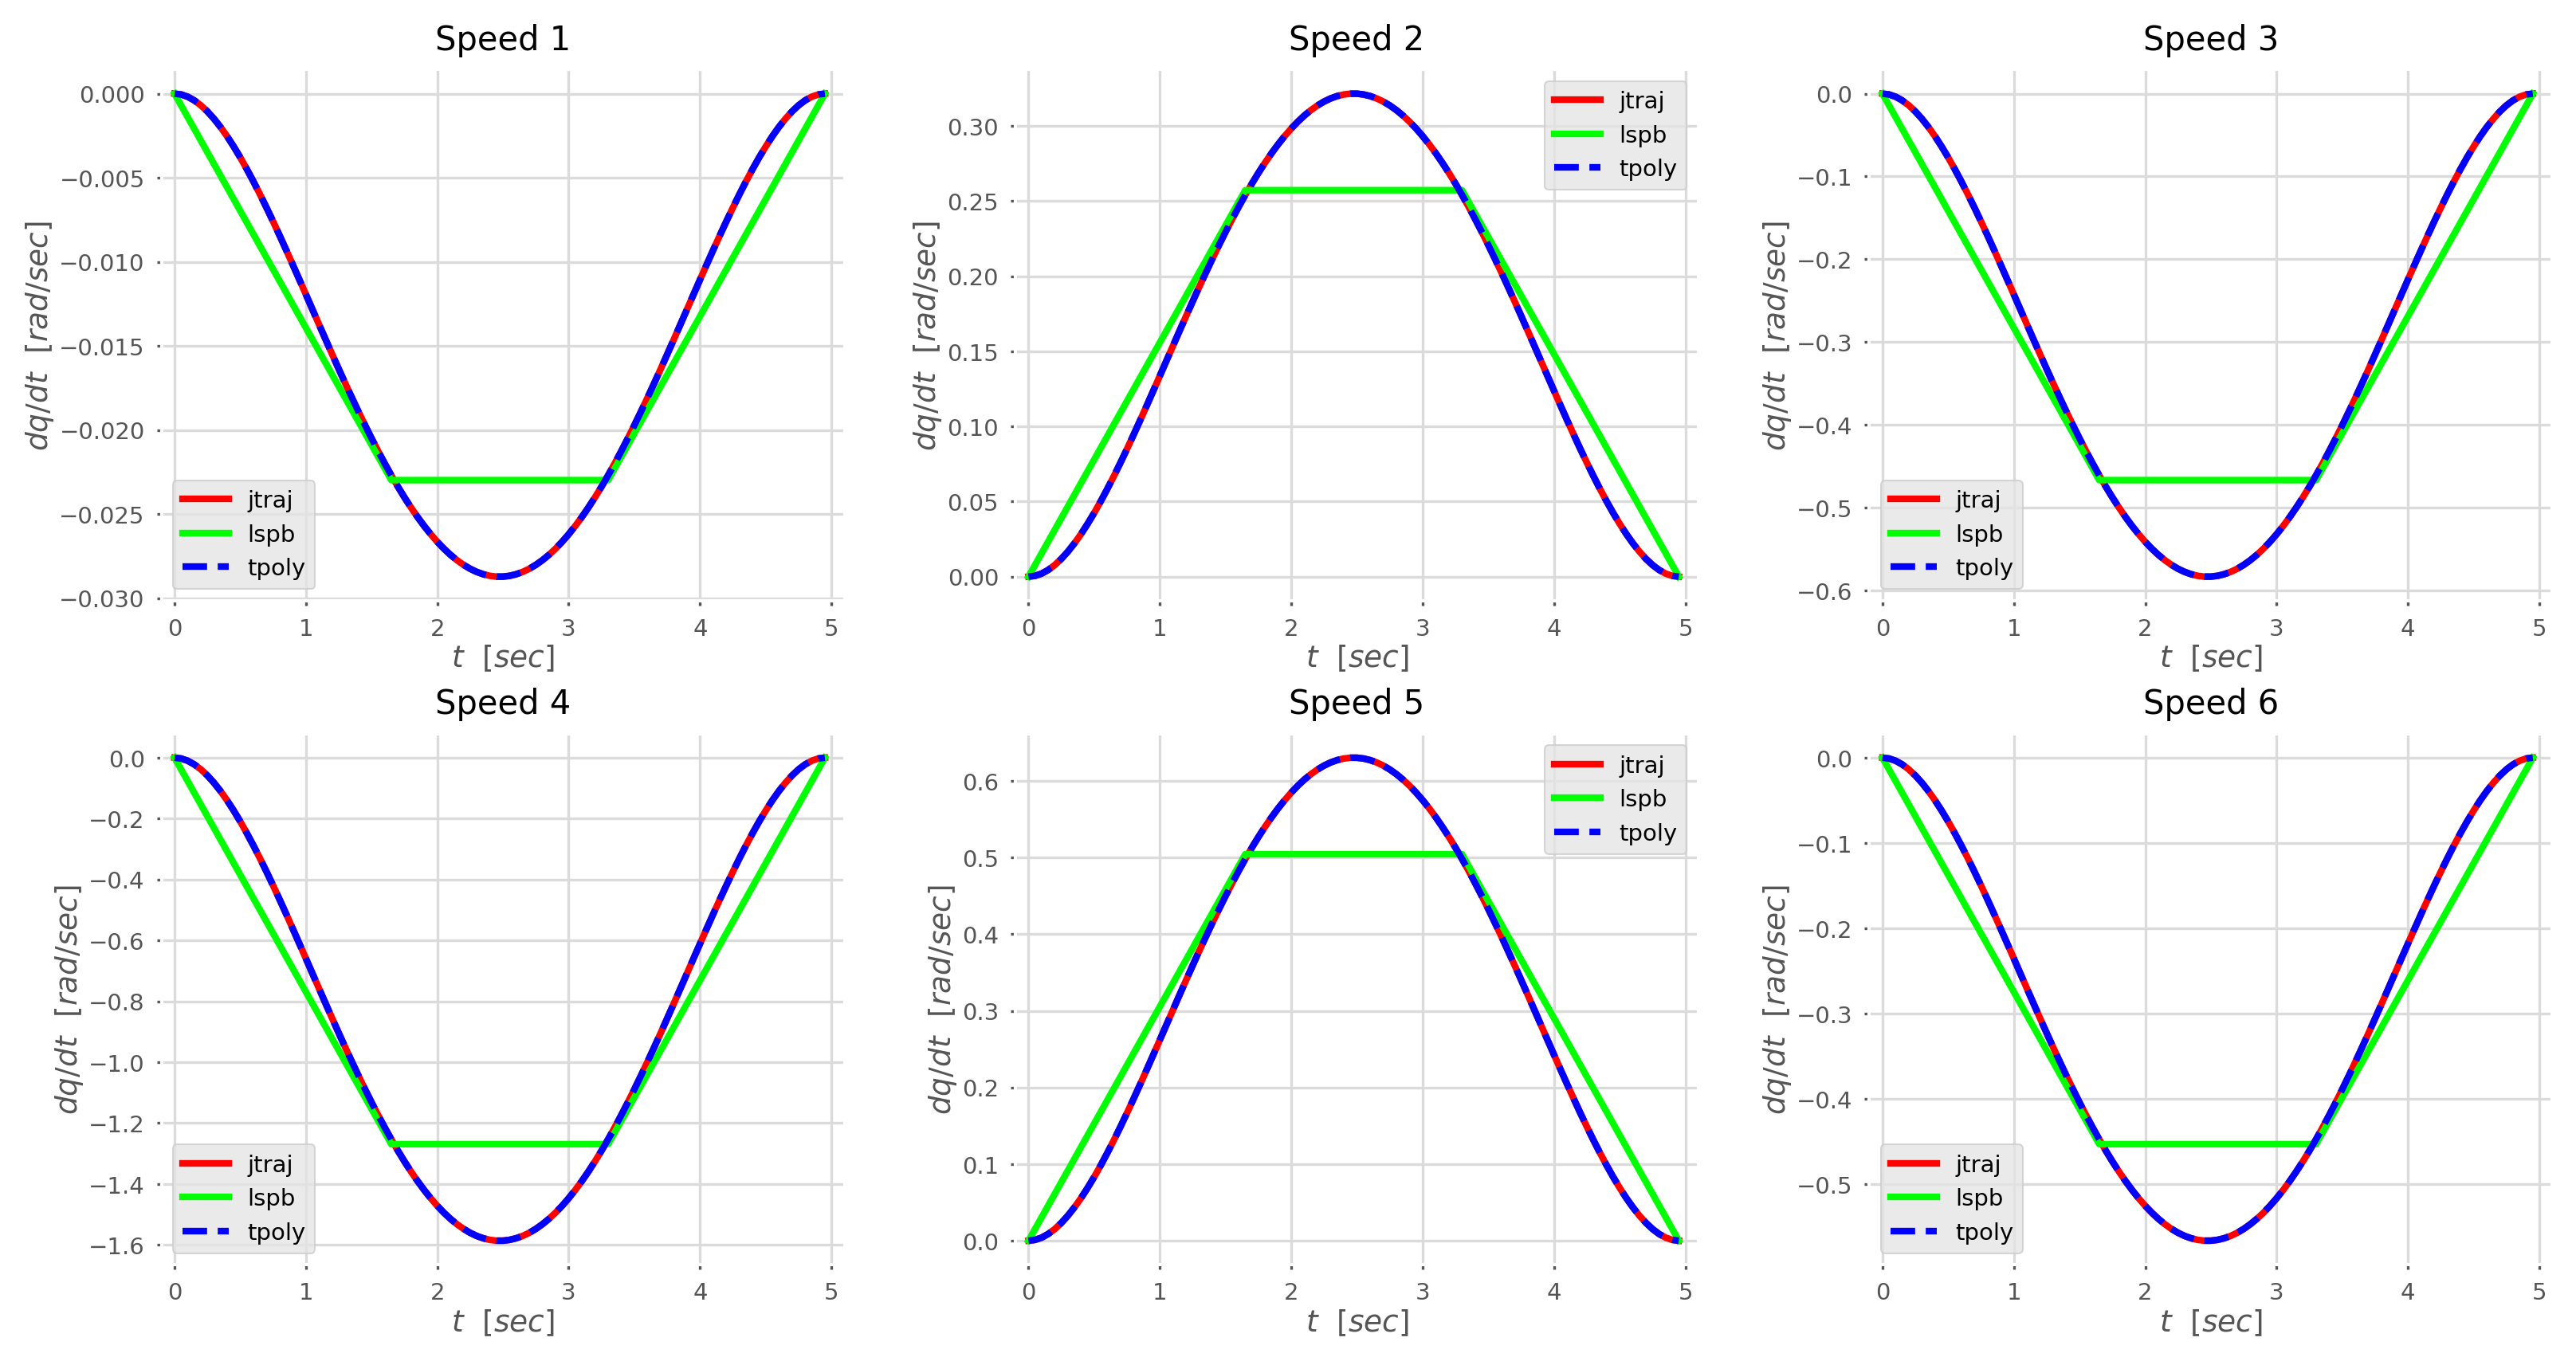

In [324]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qd[i][g-1] for i in range(len(tr_jtraj.qd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qd[i][g-1] for i in range(len(tr_trap.qd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qd[i][g-1] for i in range(len(tr_quin.qd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Speed {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$dq/dt$  [$rad/sec$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Let's plot acceleration graphs for each link

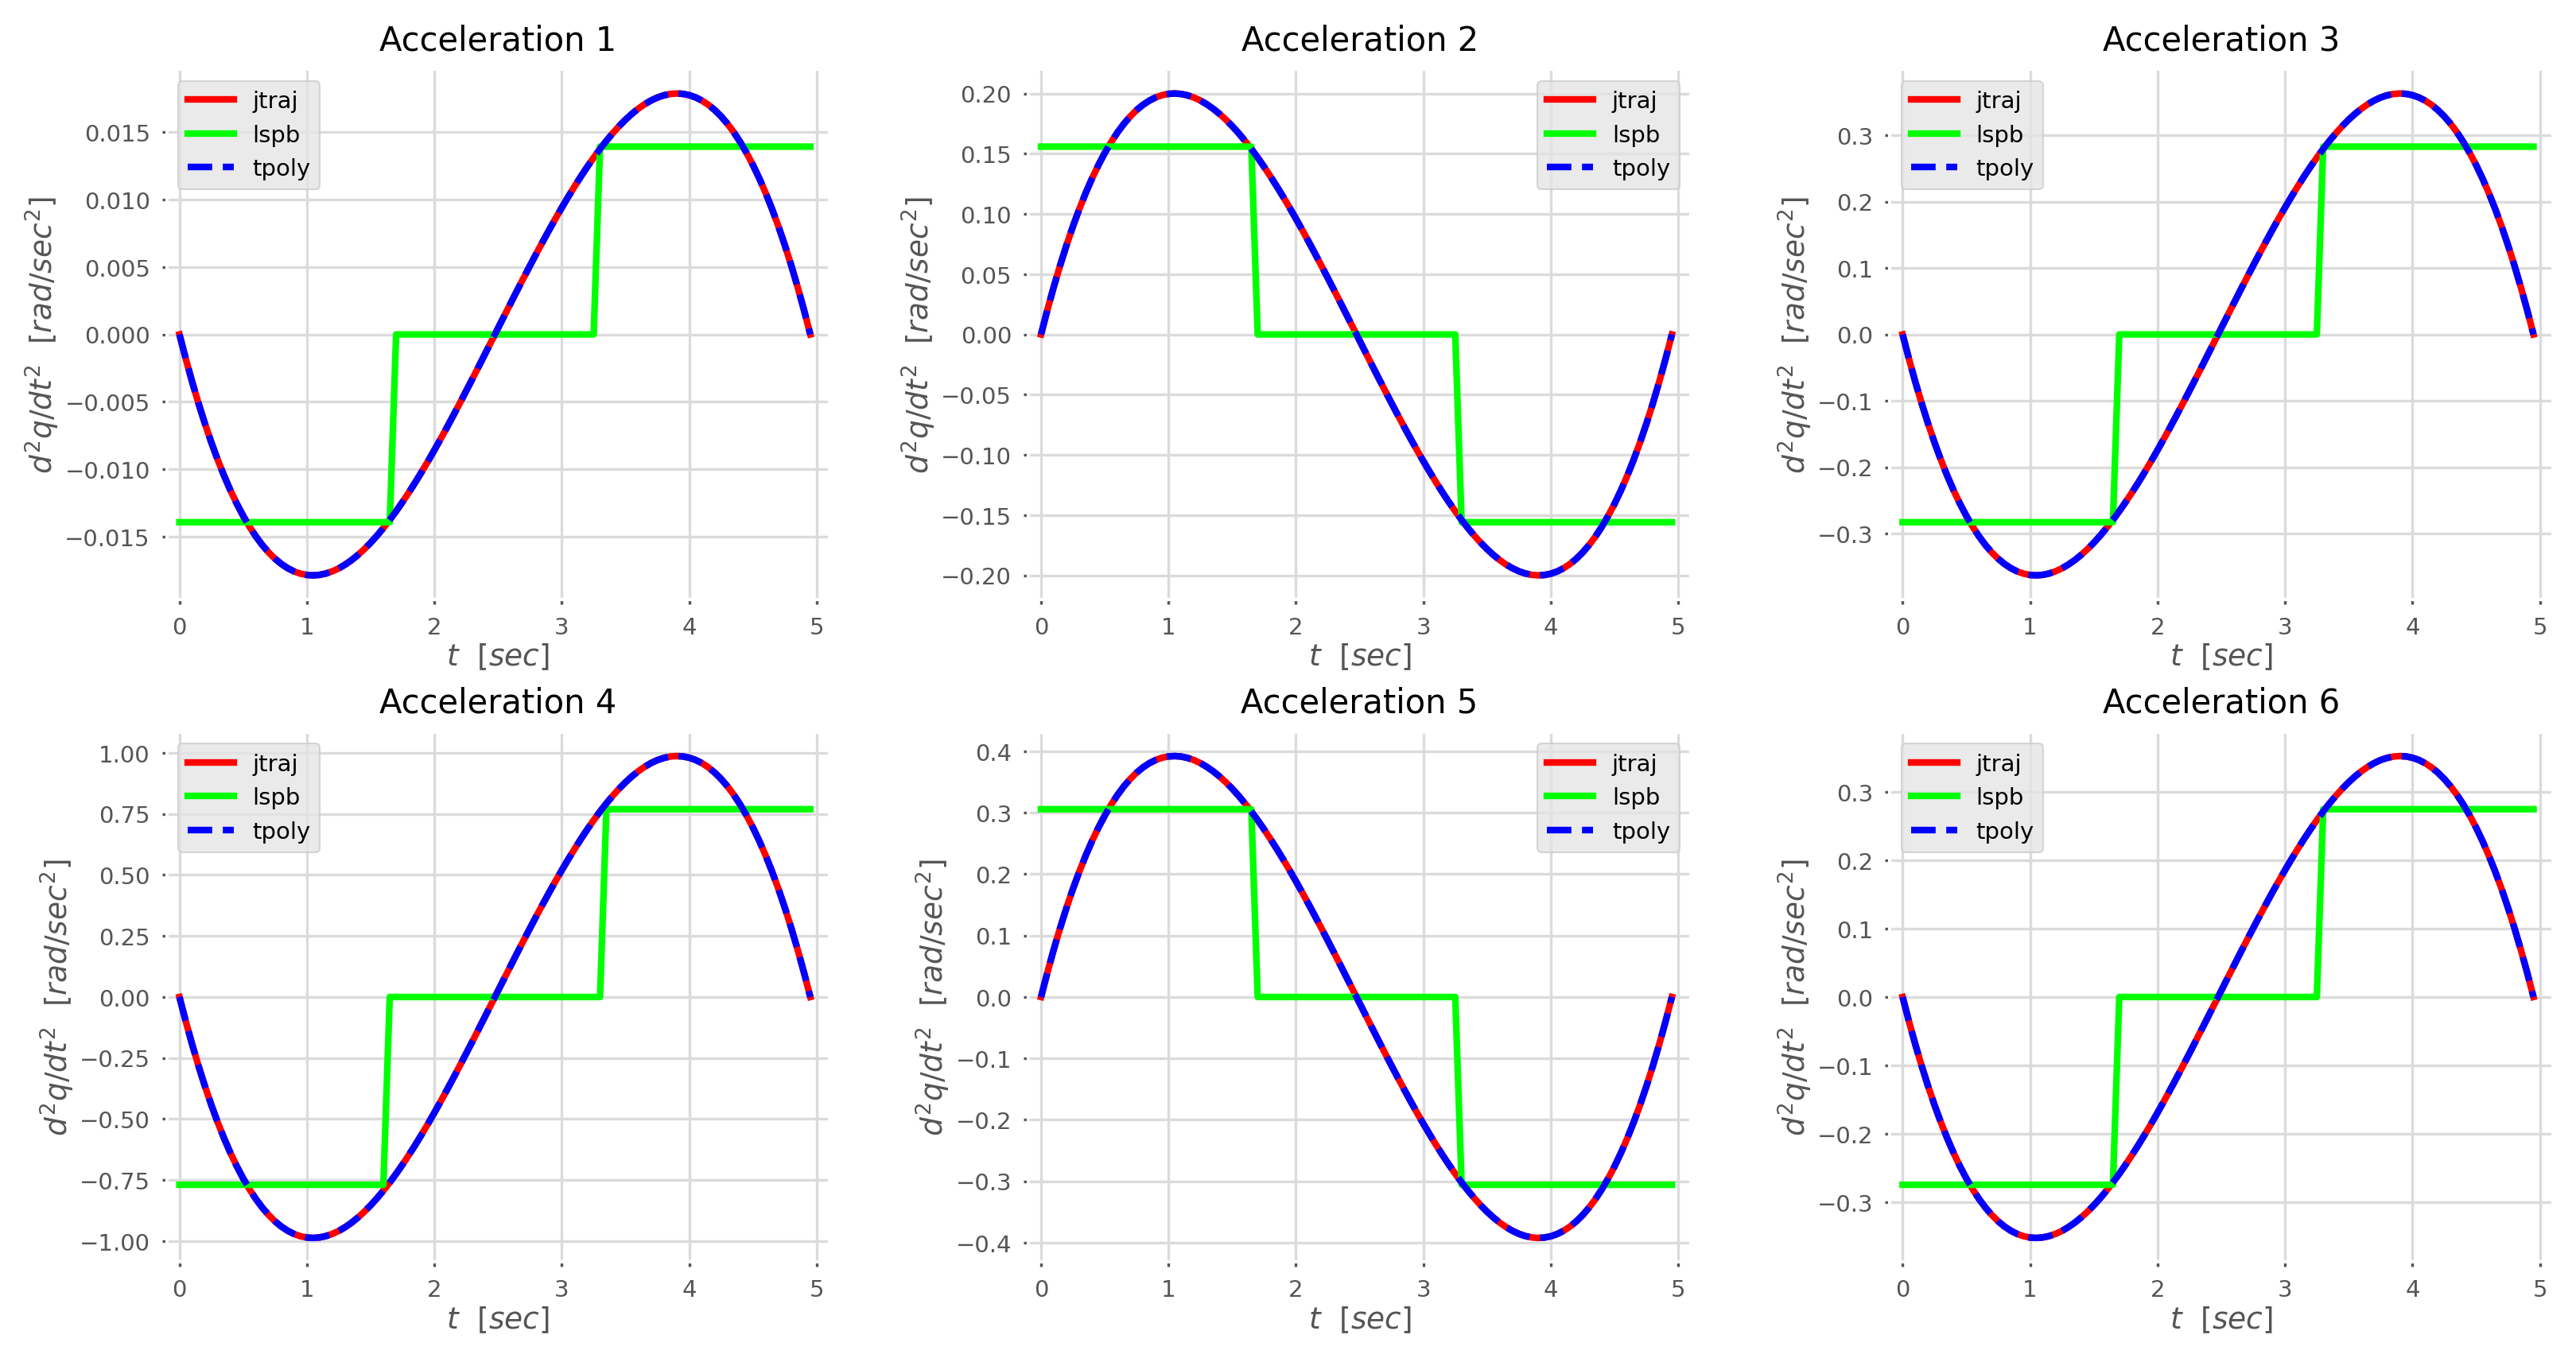

In [325]:
fig = plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qdd[i][g-1] for i in range(len(tr_jtraj.qdd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qdd[i][g-1] for i in range(len(tr_trap.qdd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qdd[i][g-1] for i in range(len(tr_quin.qdd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Acceleration {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"${d^2}q/d{t^2}$  [$rad/{sec}^2$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

### 9. Conclusion

The analysis of the position, velocity, and acceleration graphs for each robot joint reveals key characteristics of the three trajectory planning methods: `jtraj`, `lspb`, and `tpoly`. In terms of position, all methods successfully move the manipulator to the desired final configuration, but `tpoly` (quintic polynomial) provides the smoothest and most natural-looking motion profiles. The velocity graphs show that `tpoly` generates smooth, bell-shaped curves with continuous transitions, while `lspb` (linear segment with parabolic blends) produces trapezoidal profiles, and `jtraj` often introduces sharp changes, especially at the start and end of motion. Acceleration plots further highlight these differences: `tpoly` maintains continuity and minimizes jerk, whereas `lspb` shows sudden changes at segment boundaries, and `jtraj` exhibits high acceleration peaks that may induce vibrations in physical systems. Overall, `tpoly` is the most suitable for applications requiring smooth and precise motion, while `lspb` offers a good balance between simplicity and performance. `jtraj` is less smooth but can be effective for rapid point-to-point movements where jerk and acceleration are less critical.
